In [1]:
import numpy as np
import cv2
from hdrtool import hdr
import pandas as pd
import os
import importlib
import time
import matplotlib.pyplot as plt
import threading

In [2]:
df = pd.read_csv('./images/memorial.hdr_image_list.csv', sep='\s+') 

In [3]:
df['exposetime'] = 1/df['1/shutter_speed']

In [4]:
df.exposetime

0     32.000000
1     16.000000
2      8.000000
3      4.000000
4      2.000000
5      1.000000
6      0.500000
7      0.250000
8      0.125000
9      0.062500
10     0.031250
11     0.015625
12     0.007812
13     0.003906
14     0.001953
15     0.000977
Name: exposetime, dtype: float64

In [6]:
N = len(df)
imgs = []

In [7]:
for fn in df.Filename:
    imgs.append(cv2.imread(os.path.join('./images',fn)))

## Test

In [18]:
def expand_integer_grid(arr, n_classes):
    """

    :param arr: N dim array of size i_1, ..., i_N
    :param n_classes: C
    :returns: one-hot N+1 dim array of size i_1, ..., i_N, C
    :rtype: ndarray

    """
    one_hot = np.zeros(arr.shape + (n_classes,))
    axes_ranges = [range(arr.shape[i]) for i in range(arr.ndim)]
    flat_grids = [_.ravel() for _ in np.meshgrid(*axes_ranges, indexing='ij')]
    one_hot[flat_grids + [arr.ravel()]] = 1
    assert((one_hot.sum(-1) == 1).all())
    assert(np.allclose(np.argmax(one_hot, -1), arr))
    return one_hot

In [8]:
type(imgs)

list

In [9]:
imgstack = np.asarray(imgs)

In [10]:
images = imgstack[:,:,:,0]

In [11]:
n_class = images.max() +1
print(n_class)

256


In [19]:
onehot = expand_integer_grid(images, 256)

/home/tsai/anaconda3/envs/torch-env/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  del sys.path[0]


In [ ]:
onehot[:,images] = 1

In [21]:
onehot.shape

(16, 768, 512, 256)

In [25]:

print(imgones.shape)

(16, 768, 512)


In [34]:
nG = np.arange(1,17)[:, np.newaxis, np.newaxis]*imgones

In [36]:
nG[2, :, :]

array([[3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       ...,
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.],
       [3., 3., 3., ..., 3., 3., 3.]])

In [38]:
np.sum(nG, axis=0).shape

(768, 512)

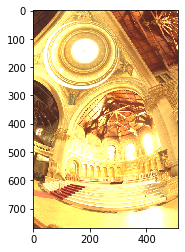

In [81]:
plt.imshow(cv2.cvtColor(cv2.imread(os.path.join('./images',df.Filename[0])), cv2.COLOR_BGR2RGB))

## Compute HDR

In [31]:
#relode module
importlib.reload(hdr)

<module 'hdrtool.hdr' from '/home/tsai/workspace/high-dynamic-range-image/hdrtool/hdr.py'>

In [ ]:
hdrs = hdr.computeHDR(imgs, np.log(df.exposetime))

channel: 0
    sampling intensities...
    running time: 1.1205694675445557
    computing response curve...
    running time: 0.9892082214355469
    building irradiance map using np...
    running time: 26.241246938705444
    building irradiance map...


In [29]:
hdrs.shape

(768, 512, 3)

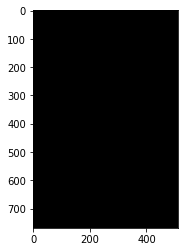

In [30]:
plt.imshow(cv2.cvtColor(hdrs, cv2.COLOR_BGR2RGB))

In [33]:
?cv2.imshow

In [48]:
inp = np.zeros((10,5))
out = np.zeros(inp.shape)

In [54]:
cv2.normalize(src=inp , dst=out, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [47]:
help(cv2.normalize)

Help on built-in function normalize:

normalize(...)
    normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
    .   @brief Normalizes the norm or value range of an array.
    .   
    .   The function cv::normalize normalizes scale and shift the input array elements so that
    .   \f[\| \texttt{dst} \| _{L_p}= \texttt{alpha}\f]
    .   (where p=Inf, 1 or 2) when normType=NORM_INF, NORM_L1, or NORM_L2, respectively; or so that
    .   \f[\min _I  \texttt{dst} (I)= \texttt{alpha} , \, \, \max _I  \texttt{dst} (I)= \texttt{beta}\f]
    .   
    .   when normType=NORM_MINMAX (for dense arrays only). The optional mask specifies a sub-array to be
    .   normalized. This means that the norm or min-n-max are calculated over the sub-array, and then this
    .   sub-array is modified to be normalized. If you want to only use the mask to calculate the norm or
    .   min-max but modify the whole array, you can use norm and Mat::convertTo.
    .   
    .   In case of spars

In [3]:
say_hi()

hi


0

In [24]:
time.time()

1585300254.8480005